In [ ]:
import pandas  as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy  as np
import seaborn as sns
#from nltk.tokenize import word_tokenize

import nltk
import re
import requests

In [ ]:
Moive=pd.read_excel("/content/Movie  .xlsx")

In [ ]:
# Unsupervised Learning
# 1) No clear understanding
# Don't know what is depedent variable
# Similarity are Assesed based on distance
# Smaller distance similar Observations & Farther Distance Observations
# Primary Distance Metric used is Eucli  Distance  (X2-x1)^2 (Y2-Y1)^2 [Under root ]
# Numeric Variable
# DISTANCE Metric used in NLP

# Cosine Similarity
#    A.B
# __________
# ||A|| ||B||

# Other Distance Measures
# Manhattan , Mahalcolbs , Hamming , Minkowki

# K-means Clustering

# Centroid Based Algorithm
# K-means is an iterative & Centroid Based Alorightm  where in each will have Centroid from which distane in Calcilated to all Observations
# Based on Smaller Distance Clustering is Done

# Objective of K - Means Algorithms
# Mining within Clustering sum Square Distance WLSS or Variance & Inertia
# Iteration Algorithms as it iterations till the point there is no Change in Cluster Formation


# What is K

# K is an Integer that decides how many Clusters will be Built
# Elbow Plot



# 2) Method is Silhouette Score Method
# Calculated Based on Inter and Intra Cluster Diffrernce


In [ ]:
Moive.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [ ]:
Moive.tail()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [ ]:
Moive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [ ]:
Moive.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [ ]:
numcols=Moive[['Rating', 'Votes', 'Revenue (Millions)','Metascore']]

In [ ]:
numcols.head(3)
# Scaling to be done as Data is in different unit Sizes

,Rating,Votes,Revenue (Millions),Metascore
0,8.1,757074,333.13,76.0
1,7.0,485820,126.46,65.0
2,7.3,157606,138.12,62.0


In [ ]:
for col in numcols.columns:
  numcols[col]=numcols[col].fillna(numcols[col].median())

<ipython-input-47-f4e5cad872ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numcols[col]=numcols[col].fillna(numcols[col].median())


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numcols_scaled=StandardScaler().fit_transform(numcols)

In [ ]:
numcols_scaled=pd.DataFrame(numcols_scaled,columns=numcols.columns)

In [ ]:
numcols_scaled.head(3)

,Rating,Votes,Revenue (Millions),Metascore
0,1.456999,3.112690,2.623377,1.021350
1,0.292924,1.674960,0.494284,0.359776
2,0.610399,-0.064676,0.614405,0.179347


In [ ]:
# Optimal Value of K can be Formed Using Direct GridSearch  Build Multiple Models from K=1 to K=15
# Save Wcss/Inertia in a list and do a elbow plot

In [ ]:
from sklearn.cluster import KMeans
import warning
warning.filterwarnings("ignore")

ModuleNotFoundError: No module named 'warning'

In [ ]:
wcss_list=[]
for i in range(1,15):
  Kmeans=KMeans(n_clusters=i,random_state=42)
  Kmeans.fit(numcols_scaled)
  wcss_list.append(Kmeans.inertia_)

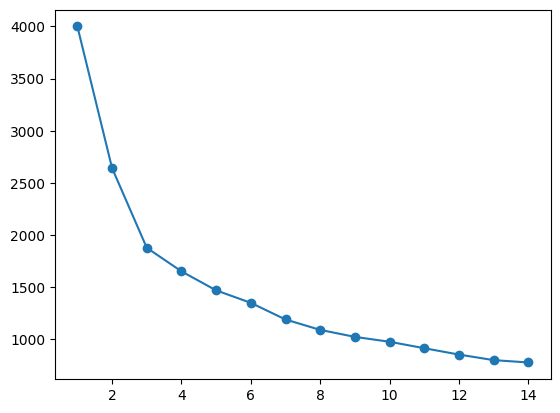

In [ ]:
plt.plot(range(1,15),wcss_list,marker="o")
plt.show()

In [ ]:
wcss_list

[3999.9999999999936,
 2640.897033889231,
 1876.2034960325286,
 1650.1510794066348,
 1467.7762208028087,
 1347.9643526331818,
 1188.1511653045532,
 1088.415891548505,
 1021.3975865530095,
 974.4160488784341,
 912.6677401045648,
 851.6149490095676,
 798.3028180385724,
 775.6800366487887]

In [ ]:
clust_final=KMeans(n_clusters=3).fit(numcols)

In [ ]:
numcols.columns

Index(['Rating', 'Votes', 'Revenue (Millions)', 'Metascore'], dtype='object')

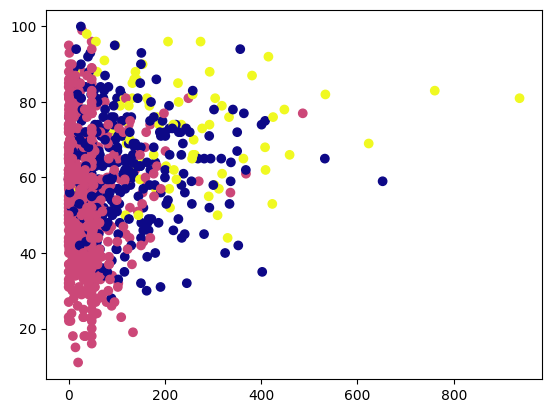

In [ ]:
plt.scatter(numcols['Revenue (Millions)'],numcols['Metascore'],cmap="plasma",c=clust_final.labels_)

In [ ]:
pd.set_option("Display.max_colwidth",None)
Moive.Description.head(2)

,Description
0,A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.
1,"Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone."


In [ ]:
pd.set_option("Display.max_colwidth",None)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
Tfidf=TfidfVectorizer(max_features=100,stop_words="english",ngram_range=(1,3))

In [ ]:
X_Tfidf=Tfidf.fit_transform(Moive.Description)

In [ ]:
X_Tfidf=pd.DataFrame(X_Tfidf.toarray(),columns=Tfidf.vocabulary_)

In [ ]:
X=pd.concat([numcols_scaled,X_Tfidf],axis=1)


In [ ]:
wcss_list=[]
for i in range(1,15):
  Kmeans=KMeans(n_clusters=i,random_state=42)
  Kmeans.fit(X)
  wcss_list.append(Kmeans.inertia_)

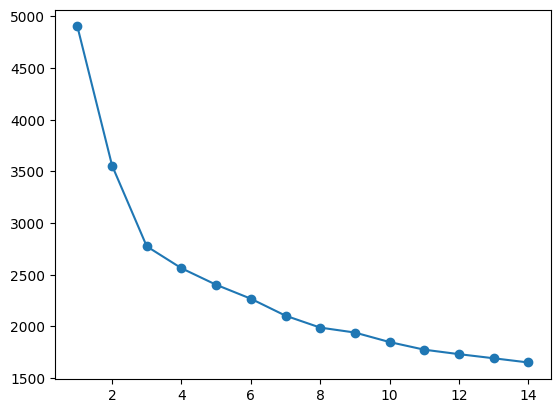

In [ ]:
plt.plot(range(1,15),wcss_list,marker="o")
plt.show()

In [ ]:
np.round(clust_final.cluster_centers_,2)*100

array([[7.1000000e+02, 2.7674171e+07, 1.1821000e+04, 6.2790000e+03],
       [6.4100000e+02, 6.2790410e+06, 4.1180000e+03, 5.5540000e+03],
       [7.8600000e+02, 6.4209705e+07, 2.3394000e+04, 7.3260000e+03]])

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(numcols_scaled,clust_final.labels_)

# Silhoutee score lies between 0 and 1
# Greater than 0.50 close to 1 ,clear Cluster formation with no overlapping
# Less than 0.50 and close to 0 , Overlapping cluster Formations

0.2023967504790466

In [ ]:

# Next Class Hierarchical Clustering
